Isolation Forest

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
data = pd.read_csv(file_path)


In [ ]:
# Clean column names by removing extra spaces
data.columns = data.columns.str.replace(' ', '')
print(data.columns)

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(data.head(10))


First 10 rows of the dataset:
   DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0               22       1266342               41                    44   
1               22       1319353               41                    44   
2               22           160                1                     1   
3               22       1303488               41                    42   
4            35396            77                1                     2   
5               22           244                1                     1   
6               22       1307239               41                    40   
7            60058            82                1                     2   
8               22           171                1                     1   
9               22           210                1                     1   

   TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
0                     2664                     6954                 4

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [ ]:
class_counts = data['class'].value_counts()

print(class_counts)

KeyError: 'class'

In [ ]:
irrelevant_columns = [
    'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets', 'FwdPacketLengthMax',
    'FwdPacketLengthMin', 'FwdPacketLengthMean', 'FwdPacketLengthStd',
    'BwdPacketLengthMax', 'BwdPacketLengthMin', 'BwdPacketLengthMean',
    'BwdPacketLengthStd', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
    'FwdIATMax', 'FwdIATMin', 'BwdIATStd', 'MinPacketLength',
    'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd',
    'PacketLengthVariance', 'PSHFlagCount', 'URGFlagCount', 'CWEFlagCount',
    'ECEFlagCount', 'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
    'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
    'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
    'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdBytes',
    'SubflowBwdBytes', 'act_data_pkt_fwd', 'min_seg_size_forward',
    'ActiveMean', 'ActiveStd', 'ActiveMax', 'ActiveMin', 'IdleMean',
    'IdleStd', 'IdleMax', 'IdleMin'
]

data = data.drop(columns=irrelevant_columns, errors='ignore')
print(len(data.columns))


31


In [ ]:
begnin_count = data[data['Label'] == 'BENIGN'].shape[0]
print(f"Number of BENIGN samples: {begnin_count}")

portscan_count = data[data['Label'] == 'PortScan'].shape[0]
print(f"Number of PortScan samples: {portscan_count}")


Number of BENIGN samples: 127292
Number of PortScan samples: 158804


In [ ]:
from math import floor
benign_samples = data[data['Label'] == 'BENIGN']
percentage = 0.3
malicious_samples = data[data['Label'] == 'PortScan'].sample(n=floor((begnin_count*percentage)/(1-percentage)), random_state=42)

# Combine the sampled data
data = pd.concat([benign_samples, malicious_samples])

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:

print(data['Label'].value_counts())

Label
BENIGN      127292
PortScan     54553
Name: count, dtype: int64


In [ ]:
# Calculate the correlation matrix, ignoring non-numerical columns
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Find highly correlated features (e.g., with correlation > 0.9)
high_corr = correlation_matrix[correlation_matrix > 0.9]
print(high_corr)


                         DestinationPort  FlowDuration  TotalFwdPackets  \
DestinationPort                      1.0           NaN              NaN   
FlowDuration                         NaN      1.000000              NaN   
TotalFwdPackets                      NaN           NaN         1.000000   
TotalBackwardPackets                 NaN           NaN         0.962230   
FlowBytes/s                          NaN           NaN              NaN   
FlowPackets/s                        NaN           NaN              NaN   
FlowIATMean                          NaN           NaN              NaN   
FlowIATStd                           NaN           NaN              NaN   
FlowIATMax                           NaN           NaN              NaN   
FlowIATMin                           NaN           NaN              NaN   
BwdIATTotal                          NaN      0.987826              NaN   
BwdIATMean                           NaN           NaN              NaN   
BwdIATMax                

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")


Training set size: 145476, Test set size: 36369


In [ ]:
# Separate features and labels
features = data.drop('Label', axis=1)
labels = data['Label']
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)
features = features.select_dtypes(include=[float, int])
len(features)

181845

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [ ]:
round(data.shape[0]*80/100)

145476

In [ ]:
missing_labels = np.isnan(y_encoded).sum()
print(f"Number of missing values in y_encoded: {missing_labels}")

Number of missing values in y_encoded: 0


In [ ]:
train_size = round(len(y_encoded) * 0.8)

X_train = features_scaled[:train_size]
X_test = features_scaled[train_size:]
y_train = y_encoded[:train_size]
y_test = y_encoded[train_size:]

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

print(f"Final Length of X_test: {len(X_test)}")
print(f"Final Length of y_test: {len(y_test)}")

Length of X_train: 145476
Length of y_train: 145476
Length of X_test: 36369
Length of y_test: 36369
Final Length of X_test: 36369
Final Length of y_test: 36369


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)
#with 10%

Accuracy: 0.9999646480715523

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     25418
     Anomaly       1.00      1.00      1.00      2869

    accuracy                           1.00     28287
   macro avg       1.00      1.00      1.00     28287
weighted avg       1.00      1.00      1.00     28287


Confusion Matrix:
[[25418     0]
 [    1  2868]]

ROC AUC Score: 0.9999997874506533

Number of anomalies detected: 2868


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 5})
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)
#with 10%

Accuracy: 0.9999646480715523

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     25418
     Anomaly       1.00      1.00      1.00      2869

    accuracy                           1.00     28287
   macro avg       1.00      1.00      1.00     28287
weighted avg       1.00      1.00      1.00     28287


Confusion Matrix:
[[25418     0]
 [    1  2868]]

ROC AUC Score: 0.9999985395802949

Number of anomalies detected: 2868


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)
#with 20%

Accuracy: 0.9999371523740691

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     25400
     Anomaly       1.00      1.00      1.00      6423

    accuracy                           1.00     31823
   macro avg       1.00      1.00      1.00     31823
weighted avg       1.00      1.00      1.00     31823


Confusion Matrix:
[[25400     0]
 [    2  6421]]

ROC AUC Score: 0.9999212537129729

Number of anomalies detected: 6421


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight={0: 1, 1: 5})
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)
# with 20%

Accuracy: 0.9999371523740691

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     25400
     Anomaly       1.00      1.00      1.00      6423

    accuracy                           1.00     31823
   macro avg       1.00      1.00      1.00     31823
weighted avg       1.00      1.00      1.00     31823


Confusion Matrix:
[[25400     0]
 [    2  6421]]

ROC AUC Score: 0.9999213088788936

Number of anomalies detected: 6421


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)

Accuracy: 0.9999450081113036

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     25423
     Anomaly       1.00      1.00      1.00     10946

    accuracy                           1.00     36369
   macro avg       1.00      1.00      1.00     36369
weighted avg       1.00      1.00      1.00     36369


Confusion Matrix:
[[25423     0]
 [    2 10944]]

ROC AUC Score: 0.9999998921949729

Number of anomalies detected: 10944


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight={0: 1, 1: 5})
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)

Accuracy: 0.9999450081113036

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     25423
     Anomaly       1.00      1.00      1.00     10946

    accuracy                           1.00     36369
   macro avg       1.00      1.00      1.00     36369
weighted avg       1.00      1.00      1.00     36369


Confusion Matrix:
[[25423     0]
 [    2 10944]]

ROC AUC Score: 0.9999997825931952

Number of anomalies detected: 10944


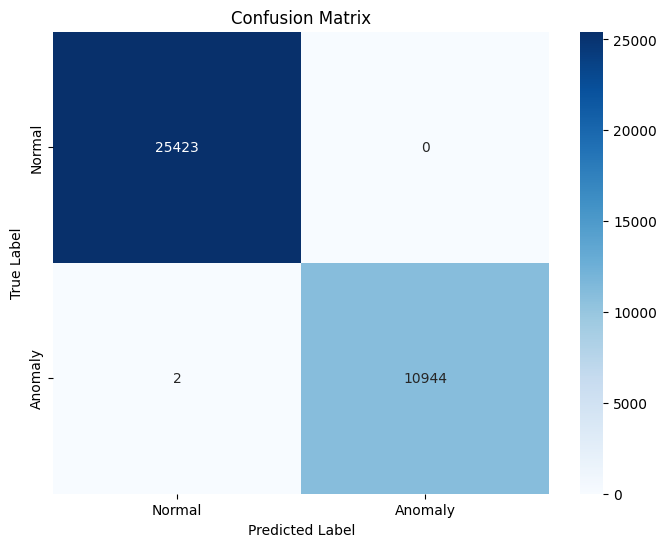

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Labels for confusion matrix
labels = ['Normal', 'Anomaly']

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=labels)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=400, random_state=42, class_weight={0: 1, 1: 5})
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)

Accuracy: 0.9999565217391304

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     21998
     Anomaly       1.00      1.00      1.00      1002

    accuracy                           1.00     23000
   macro avg       1.00      1.00      1.00     23000
weighted avg       1.00      1.00      1.00     23000


Confusion Matrix:
[[21998     0]
 [    1  1001]]

ROC AUC Score: 0.9999993648488096

Number of anomalies detected: 1001


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight={0: 1, 1: 5})
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)

Accuracy: 0.9999565217391304

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     21998
     Anomaly       1.00      1.00      1.00      1002

    accuracy                           1.00     23000
   macro avg       1.00      1.00      1.00     23000
weighted avg       1.00      1.00      1.00     23000


Confusion Matrix:
[[21998     0]
 [    1  1001]]

ROC AUC Score: 0.9999993648488095

Number of anomalies detected: 1001


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight={0: 1, 1: 5})
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)

Accuracy: 0.9999565217391304

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     21998
     Anomaly       1.00      1.00      1.00      1002

    accuracy                           1.00     23000
   macro avg       1.00      1.00      1.00     23000
weighted avg       1.00      1.00      1.00     23000


Confusion Matrix:
[[21998     0]
 [    1  1001]]

ROC AUC Score: 0.999998979221301

Number of anomalies detected: 1001


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 5})
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)

Accuracy: 0.9999565217391304

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     21998
     Anomaly       1.00      1.00      1.00      1002

    accuracy                           1.00     23000
   macro avg       1.00      1.00      1.00     23000
weighted avg       1.00      1.00      1.00     23000


Confusion Matrix:
[[21998     0]
 [    1  1001]]

ROC AUC Score: 0.999998979221301

Number of anomalies detected: 1001


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=600, random_state=42, class_weight={0: 1, 1: 5})
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Count the number of anomalies detected
num_anomalies = np.sum(y_pred == 1)  # Assuming "1" represents anomalies in your dataset
print("\nNumber of anomalies detected:", num_anomalies)

Accuracy: 0.9999565217391304

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     21998
     Anomaly       1.00      1.00      1.00      1002

    accuracy                           1.00     23000
   macro avg       1.00      1.00      1.00     23000
weighted avg       1.00      1.00      1.00     23000


Confusion Matrix:
[[21998     0]
 [    1  1001]]

ROC AUC Score: 0.9999995009526361

Number of anomalies detected: 1001
